<https://gils-lab.tistory.com/118>  
(1) 시간에 따른 미세먼지 농도를 적절한 그래프로 시각화하세요. 단, x축 이름은 date, y축 이름은 PM-10이어야 합니다.   
(2) 시간대별 평균 미세먼지 농도를 계산하세요. 즉, t시 (t = 1, 2, ..., 24)의 평균 농도를 구하시오  
(3) 시점 t의 미세먼지 농도를 시점 t-1, t-2, t-3, t-4의 농도를 이용하여 예측하는 모델을 학습하기 위한 데이터를 구성하시오. 예를 들어, 8일 24시의 미세먼지 농도를 8일 20-23시의 농도로 예측할 수 있도록 구성합니다.   
(4) (3)에서 만든 데이터를 활용하여 선형 회귀 모델을 학습하라.   

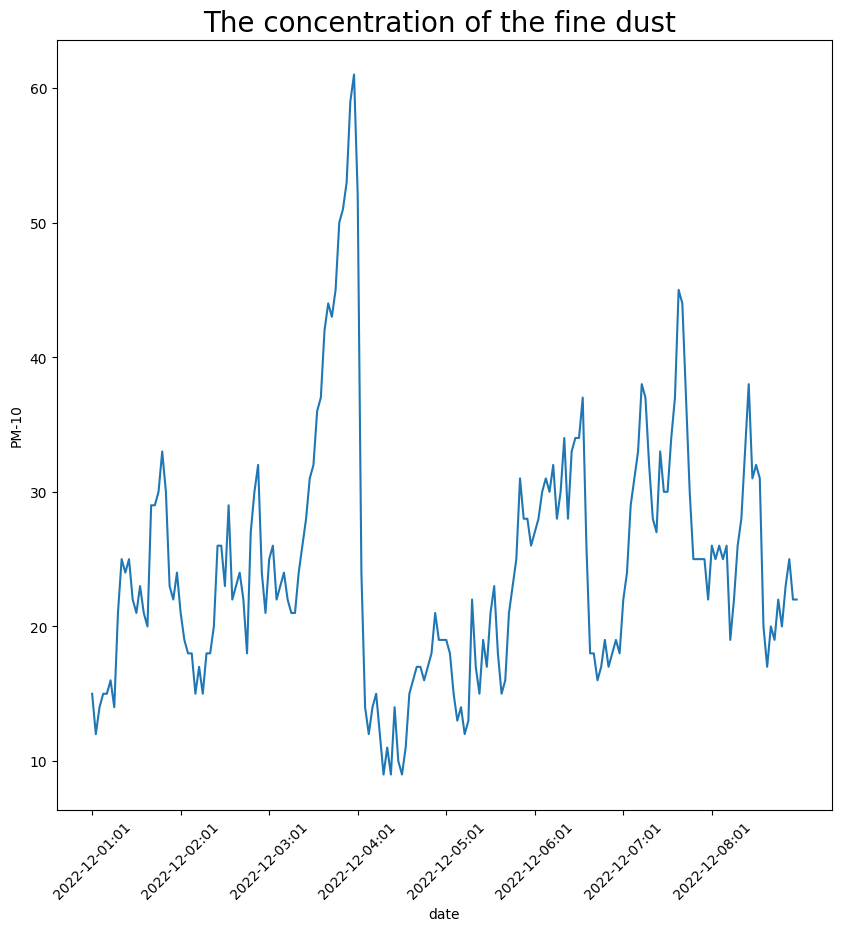

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv("PM10_seoul.csv")
data = data.sort_values('date')

# (1) 시간에 따른 미세먼지 농도를 적절한 그래프로 시각화하세요. 단, x축 이름은 date, y축 이름은 PM-10이어야 합니다. 
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10,10)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
ax.plot(data['date'],data['PM-10']) ## 선그래프 생성

plt.xlabel('date')
plt.ylabel('PM-10') 
plt.xticks(np.arange(0, len(data), 24), rotation=45) ## x축 눈금 라벨 설정 - 45도 회전, 24시간 간격으로 레이블링. 
plt.title('The concentration of the fine dust ',fontsize=20) ## 타이틀 설정
plt.show()

# # data의 date는 지금 str 형식임. 이걸 숫자로 하는 열을 하나 추가할 것.
# from datetime import datetime 
# date = data['date']

# # 정말 놀랍게도 몇시인지 값이 무조건 0~23 사이어야 datetime으로 바꿀 수 있는데, 현재는 1~24임. 이걸 맞춰줘야 함. 내 생각에 24시를 0시로만 바꿔주면 될듯?
# new_date = []

# for d in date:
#     if int(d[-2:]) == 24:
#         new_hour = 0
#     else:
#         new_hour = int(d[-2:])
#     d = d[:-2] + str(new_hour)
#     new_date.append(d)

# try: 
#     kdate = [datetime.strptime(d, '%Y-%m-%d:%H') for d in new_date] 
# except ValueError as ve1:
#      print('ValueError 1:', ve1)

# data['kdate'] = kdate
# # print(data)

# # kdate 순으로 오름차순 정렬
# data = data.sort_values('kdate')


# # (1) 시간에 따른 미세먼지 농도를 적절한 그래프로 시각화하세요. 단, x축 이름은 date, y축 이름은 PM-10이어야 합니다. 
# import matplotlib.pyplot as plt
# %matplotlib inline

# fig = plt.figure(figsize=(10,10)) ## 캔버스 생성
# fig.set_facecolor('white') ## 캔버스 색상 설정
# ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
# ax.plot(data['kdate'],data['PM-10']) ## 선그래프 생성

# plt.xlabel('date')
# plt.ylabel('PM-10') 
# plt.xticks(rotation=45) ## x축 눈금 라벨 설정 - 40도 회전 
# plt.title('The concentration of the fine dust ',fontsize=20) ## 타이틀 설정
# plt.show()

# # data의 행 index를 kdate행으로 정하기
# data = data.set_index('kdate')
# # print(data)

In [3]:
# (2) 시간대별 평균 미세먼지 농도를 계산하세요. 즉, t시 (t = 1, 2, ..., 24)의 평균 농도를 구하시오
data['time'] = data['date'].str.slice(-2, )
# print(data)

mean_percentage_time = data.groupby('time')['PM-10'].mean()
print(mean_percentage_time)
# print(mean_percentage_time) # t = 1, 2, ..., 24 의 순서대로 평균 농도를 정렬함 

time
01    25.875
02    22.000
03    21.000
04    21.000
05    21.375
06    21.375
07    20.250
08    22.375
09    23.125
10    22.750
11    27.000
12    25.125
13    25.250
14    28.000
15    24.500
16    24.500
17    26.500
18    25.500
19    25.125
20    27.000
21    28.125
22    28.125
23    27.250
24    26.625
Name: PM-10, dtype: float64


In [4]:
# (3) 시점 t의 미세먼지 농도를 시점 t-1, t-2, t-3, t-4의 농도를 이용하여 예측하는 모델을 학습하기 위한 데이터를 구성하시오. 예를 들어, 8일 24시의 미세먼지 농도를 8일 20-23시의 농도로 예측할 수 있도록 구성합니다.   

# 데이터의 형태: PM-10이 라벨, t-1, t-2, t-3, t-4의 농도가 특징이 되도록 데이터 프레임 만들기. 

# 내 의견: t >= 4일때부터 이러한 데이터를 갖출 수 있음.
for k in range(1, 5):
    data['PM-10_' + str(k)] = data['PM-10'].shift(k) # k시간 전의 농도 열을 특성으로 추가. 
data.dropna(inplace = True) # NA가 생긴 행 제거   
data = data.drop(['time', 'date'], axis = 1) # 모델링에 불필요한 변수 제거
print(data) 


     PM-10  PM-10_1  PM-10_2  PM-10_3  PM-10_4
187     15     15.0     14.0     12.0     15.0
186     16     15.0     15.0     14.0     12.0
185     14     16.0     15.0     15.0     14.0
184     21     14.0     16.0     15.0     15.0
183     25     21.0     14.0     16.0     15.0
..     ...      ...      ...      ...      ...
4       20     22.0     19.0     20.0     17.0
3       23     20.0     22.0     19.0     20.0
2       25     23.0     20.0     22.0     19.0
1       22     25.0     23.0     20.0     22.0
0       22     22.0     25.0     23.0     20.0

[188 rows x 5 columns]


In [5]:
# (4) (3)에서 만든 데이터를 활용하여 선형 회귀 모델을 학습하라. 
from sklearn.linear_model import LinearRegression
X = data.drop('PM-10', axis = 1)
y = data['PM-10']

model = LinearRegression().fit(X, y)

In [9]:
print(model.intercept_, model.coef_, model.score(X, y))

#display adjusted R-squared
print(1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

3.466649934349661 [ 1.13476648 -0.3013629   0.12396585 -0.09643159] 0.8224427294536858
0.8185616962177008


Coefficients: 
 [ 1.13476648 -0.3013629   0.12396585 -0.09643159]
Mean squared error: 15.09
Coefficient of determination: 0.82


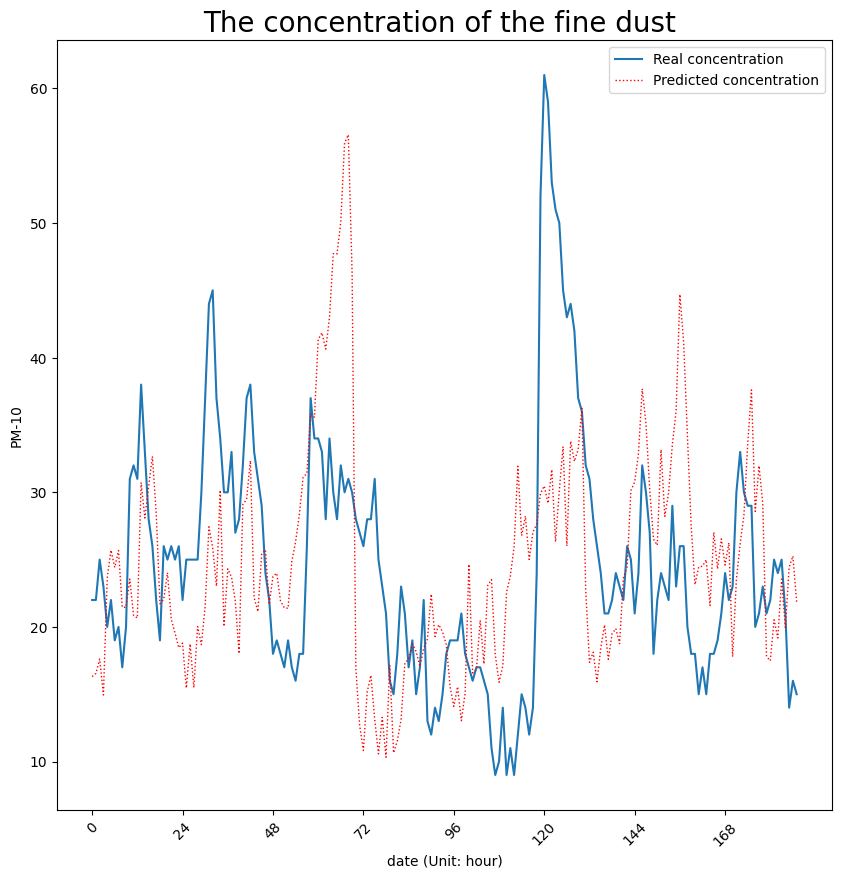

In [7]:
# 별개: 훈련시킨 선형 회귀모델을 그래프에 표시하기. 
y_pred = model.predict(X) # 현재 X값에 대한 예측치

# The coefficients
from sklearn.metrics import mean_squared_error, r2_score
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, y_pred))

# 그래프 표시
fig = plt.figure(figsize=(10,10)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
ax.plot(data['PM-10'], label = 'Real concentration') ## 선그래프 생성

plt.xlabel('date (Unit: hour)')
plt.ylabel('PM-10') 
plt.xticks(np.arange(0, len(data), 24), rotation=45) ## x축 눈금 라벨 설정 - 45도 회전, 24시간 간격으로 레이블링. 
plt.title('The concentration of the fine dust ',fontsize=20) ## 타이틀 설정

plt.plot(y_pred, color="red", linewidth=1, linestyle= 'dotted', label = 'Predicted concentration') # 모델이 예측한 값
plt.legend()
plt.show()